# Introducrtion to Machine Learning: Assignment #1
## Submission date: 31\1\2024, 23:59.
### Topics:
- Linear regression
- Gaussian Bayes
- Naïve bayes
- KNN

***לחקתי אישור משרון כדי להגיש עד יום שבת 3.2***

Submitted by:

 **Student 1 Elias_Daw+314934092

 **Student 2 Ahmad Igbaria+322751041

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


## Question 1 - Linear regression

You will implement simple linear regression alone! <br/> The dataset consists of few 1-feature samples $\{(x_i,y_i )\}_{i=1}^∞$ where $y_i$ is the prediction of the $x_i$ sample. <br/>
We will only try to fit the given data, <u>without validation or test</u>.<br/>
We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.


import libarires

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>Assume the data is already zero-centered

In [7]:
def Linreg_sol(X, y):


	#(X^T ) transporter
	Xt = X.T
	# calc (X^T *X)
	Xtd=Xt.dot(X)
	# Xtd
	Xtd_inv = np.linalg.inv(Xtd)
	#(X^T * X)^(-1) *X^T
	Xtd_inv_Xt = Xtd_inv.dot(Xt)

	W = Xtd_inv_Xt.dot(y)


	return W

first visualization

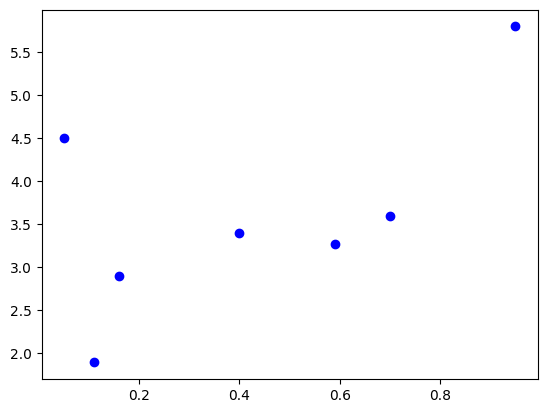

In [8]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

Split the data to A,b.<br/>
Since the data is non-zero centered, center it to mean zero (since we discussed only y=wx). Then, run the solution.

In [9]:
X = data[:,0].reshape(-1,1)
y = data[:,1]
#reshape the victoeor

mean_X = np.mean(X) #we here use the np from the import
mean_y = np.mean(y)
mean = [mean_X,mean_y]

X_centered = X - mean_X #order the turtioal
y_centered = y - mean_y


w = Linreg_sol(X_centered,y_centered)

#print
print(f'The linear line is y={w[0]:.2f}*(x-{mean[0]:.2f})+{mean[1]:.2f}')

The linear line is y=2.17*(x-0.42)+3.62


Plot the line solution <br/>

The linear line is y=2.17*(x-0.42)+3.62


Does the line really fits the data? <br/>

No , the line does not fit the data points but its an approximate and this is what is expected in linear reg we try to minimize the avg error


<font color='red'>Write here your answer and explain why</font>

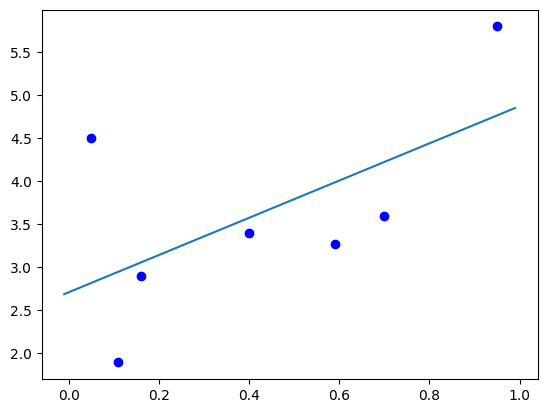

In [10]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean[0]) + mean[1]
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

As we learned, try scaling using standardization, repeat the above process.<br/>DON'T use sklearn

In [11]:
mean_X = np.mean(data[:, 0])
std_X = np.std(data[:, 0])
X_standardized = (data[:, 0] - mean_X) / std_X

mean_y = np.mean(data[:, 1])
std_y = np.std(data[:, 1])
y_standardized = (data[:, 1] - mean_y) / std_y

# caluc the xstand and reashpe the victore
X_standardized = X_standardized.reshape(-1, 1)
w = Linreg_sol(X_standardized, y_standardized)

#print the new line
print(f'The linear line is y=({w[0]:.2f}*((x-{mean_X:.2f})/{std_X:.2f})*{std_y:.2f}+{mean_y:.2f})')



The linear line is y=(0.59*((x-0.42)/0.31)*1.15+3.62)


Plot the line solution <br/>
Is the result better? <br/>
Hint: compare both lines obtained. Why do you think this happened? <br/>
<font color='red'>Write here your answer and explain why</font>


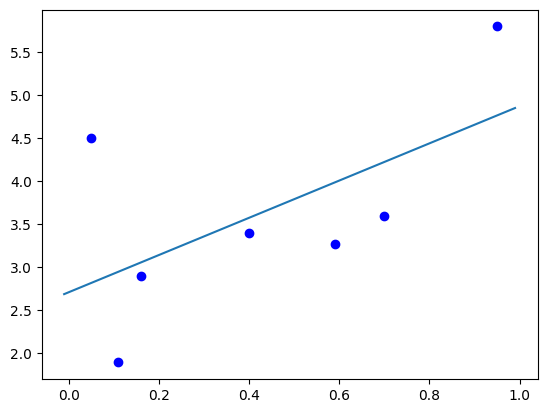

In [12]:
x = np.arange(-0.01, 1, 0.01)
y = w * (x - mean_X) * std_y / std_X + mean_y
plt.plot(x,y)

plt.scatter(data[:,0], data[:,1], color='blue', label='Data')
plt.show()

We Say that a point as outlier if it is located further than one standard deviation above or below the best-fit line. <br/>
Find and print the outliers from the (original) dataset


In [13]:
#array to save the distances for every point
distances = []
#loop for for get all the points in the data
for x, y in data:
    distance = np.abs(y - (w[0] * ((x - mean_X) / std_X) * std_y + mean_y))
    distances.append(distance) #push the distance to list disatnces

std_dist = np.std(data[:, 1]) #stat tikn

outliers = [] #array to save the outliers points

for point, distance in zip(data, distances): #loop for for get all the distances that in the list distances
    if distance > std_dist: # we check if the distance bigger than the std_dist we calaculted
        outliers.append(point) # if yes , we push the point to the outliers list by append

print(outliers)

[array([0.05, 4.5 ])]


Run the linear regression again, but remove the outliers <br/>
Is the result better? <br/>
<font color='red'>Write here your answer and explain</font>

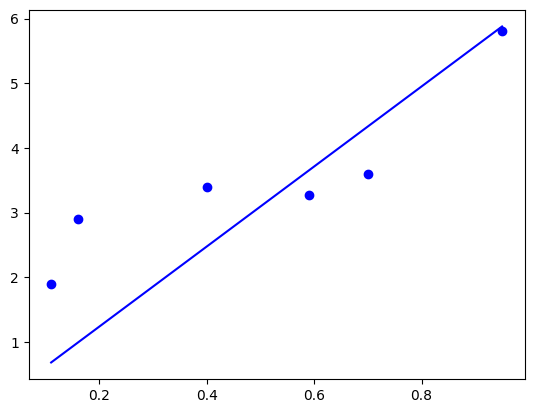

In [14]:
data = np.array([[0.4, 3.4], [0.95, 5.8], [0.16, 2.9], [0.7, 3.6], [0.59, 3.27], [0.11, 1.89], [0.05, 4.5]])
#we here save ethe data

#here we set list for the points inliers
data_no_outliers = np.array([d for d in data if not any((d == x).all() for x in outliers)])

X_no_outliers = data_no_outliers[:, 0].reshape(-1, 1)
y_no_outliers = data_no_outliers[:, 1]

#new w
w_no_outliers = Linreg_sol(X_no_outliers, y_no_outliers)

#we here do plot- and the color is blude
plt.scatter(data_no_outliers[:, 0], data_no_outliers[:, 1], color='blue')

# plot the line
x = np.linspace(min(data_no_outliers[:, 0]), max(data_no_outliers[:, 0]), 100)
y_new = w_no_outliers[0] * x
plt.plot(x, y_new, color='blue')
plt.show()

## Question 2 - Gaussian bayes


You are given data of wine bottles and want to learn the type of wine which it belongs to. The dataset consists of 13 continuous features and 3 classes of wine. <br/>
Since the data is continuous, you will implement Gaussian bayes and compare to Gaussian naïve bayes.

import libarires

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal

Load the wine dataset from https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv

In [48]:
#load the url from the data
url = "https://sharon.srworkspace.com/ml/datasets/hw1/wine.data.csv"
df = pd.read_csv(url)

print(df.head(5))


   Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315 of diluted wines  Proline  Class  
0           

Check if there is even potential for gaussian assumption to work here, by plotting the density of the features, using plotting for data frames. <br/>
Will gaussian bayes work here or not? <br/>
<font color='red'>Write here your answer and explain it</font>

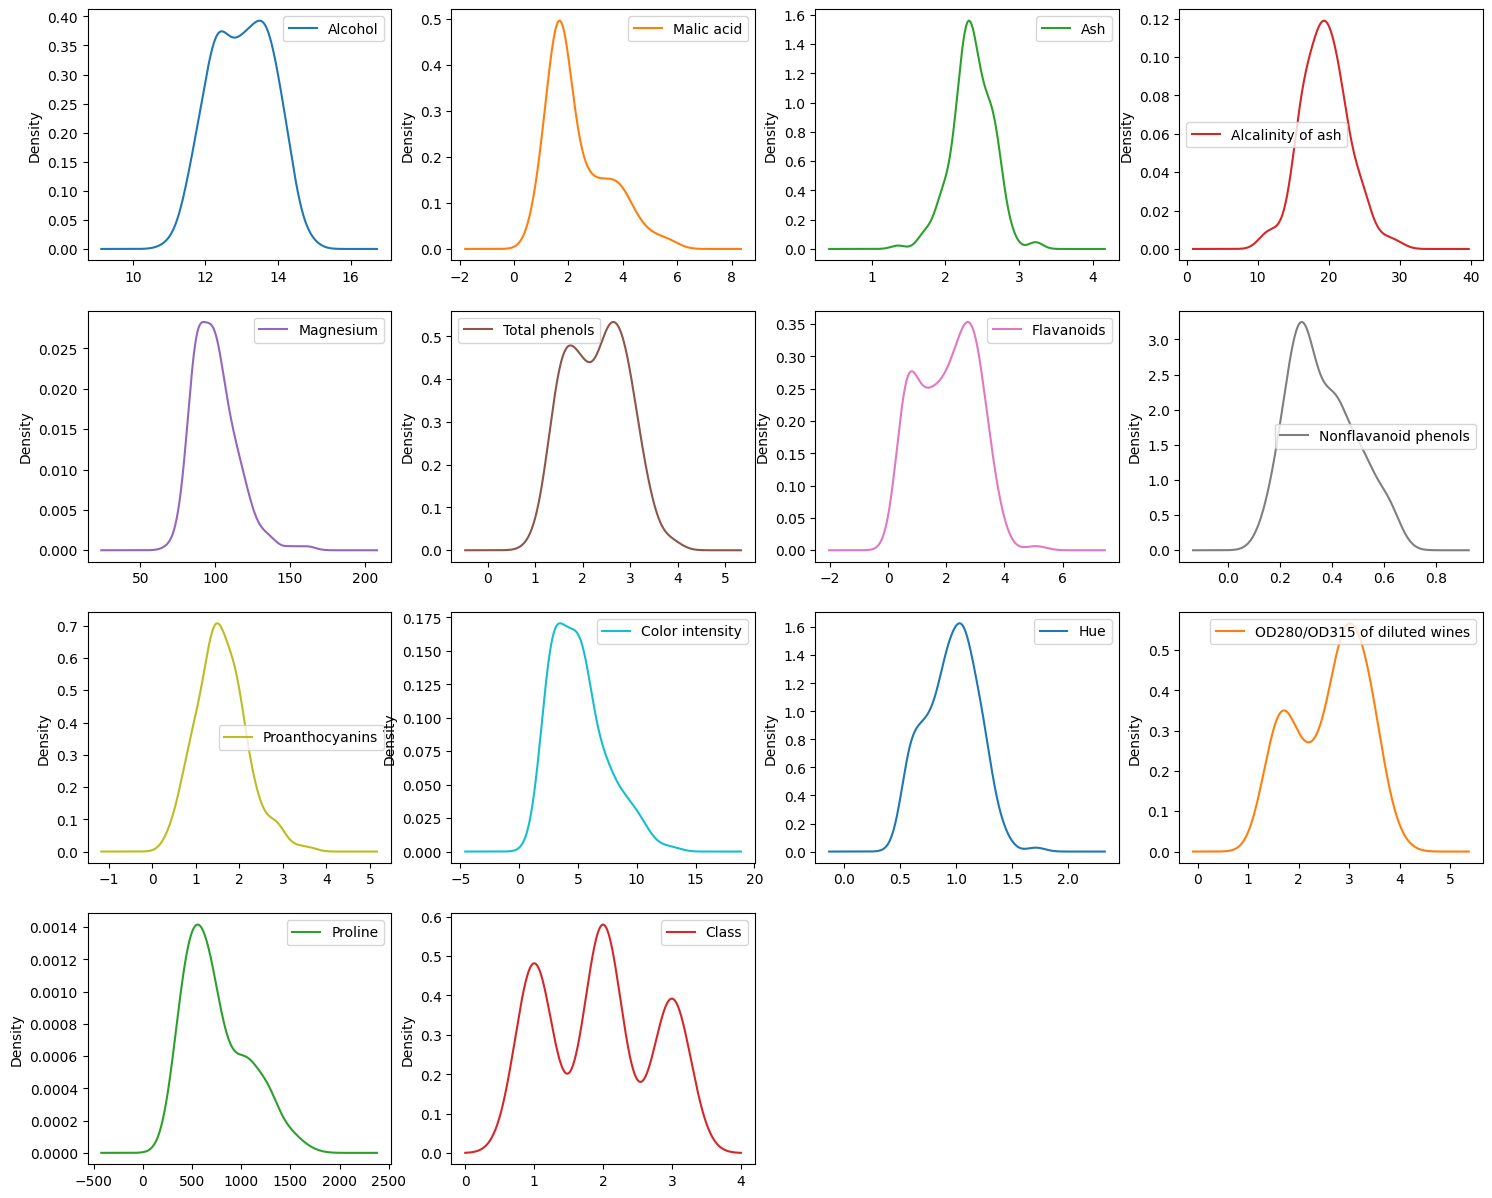

In [27]:
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(18, 15), sharex=False)
plt.show()

Convert the data to numpy and split the data to 80% training and 20% test with random state of 25. <br/>Note that the data frame currently includes the labels as well.

In [28]:
data = df.to_numpy()


X = data[:, :-1]  # all the colmuns in the data , but the last no
y = data[:, -1]  # the last is the target

# we split the data 20% 80% by random state 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

Implement the functions below. <br/>Both get test point x and return the predicted class, but the naïve bayes assumes that the features are independent.<br/>
Hint for efficient implementation: you don't need more than one loop, use numpy!

In [49]:
def classify_point_gaussian_bayes(x):
    class_labels = np.unique(y_train)
    n_features = X_train.shape[1]
    n_classes = len(class_labels) #num f the classes

    means = np.zeros((n_classes, n_features)) #ithol in zeros
    cov_matrices = [np.zeros((n_features, n_features)) for _ in range(n_classes)] #ithil the matirx of the covriance in zero , the size is n_features*n_features
    priors = np.zeros(n_classes) #list moathal in zeros

    for i, label in enumerate(class_labels): #loop for for every label
        X_class = X_train[y_train == label]
        means[i] = X_class.mean(axis=0)
        cov_matrices[i] = np.cov(X_class.T)
        priors[i] = X_class.shape[0] / X_train.shape[0]

    posteriors = np.zeros(n_classes)
    for i in range(n_classes):
        density = multivariate_normal(mean=means[i], cov=cov_matrices[i]).pdf(x)
        posteriors[i] = density * priors[i]
    return class_labels[np.argmax(posteriors)]

def classify_point_gaussian_naive_bayes(x):
    class_labels = np.unique(y_train)
    n_features = X_train.shape[1]
    n_classes = len(class_labels)

    means = np.zeros((n_classes, n_features))
    variances = np.zeros((n_classes, n_features))
    priors = np.zeros(n_classes)

    for i, label in enumerate(class_labels):
        X_class = X_train[y_train == label]
        means[i] = X_class.mean(axis=0)
        variances[i] = X_class.var(axis=0)
        priors[i] = X_class.shape[0] / X_train.shape[0]

    log_likelihoods = np.zeros(n_classes)
    for i in range(n_classes):
        # Calculate the Gaussian log-likelihood for independent features
        log_prob = -0.5 * np.sum(np.log(2 * np.pi * variances[i]) + ((x - means[i]) ** 2) / variances[i])
        log_likelihoods[i] = log_prob + np.log(priors[i])
    return class_labels[np.argmax(log_likelihoods)]

Look at the test accuracies for both methods. Explain the differences origin. <br/>
Hint: Use correlation matrix visualization for data frames.  
<font color='red'>Write here your answer and explain it</font>

<br/> Reminder: success rate is the precentage of correctly classified data within the number of all data in the test set.

In [50]:
res = []
for idx, test_point in enumerate(X_test):
    res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])

print(f'Test accuracy for gaussian bayes is {res.count(True)/len(res)}')

res = []
for idx, test_point in enumerate(X_test):
    res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])

print(f'Test accuracy for gaussian naive bayes is {res.count(True)/len(res)}')

Test accuracy for gaussian bayes is 0.9722222222222222
Test accuracy for gaussian naive bayes is 0.9444444444444444


Now, scale the data using StandardScaler.<br/>
Make sure that you are scaling the test according to the training (as learned in class)


In [51]:
#here we scaler standrted order to turtuial
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train=X_train_scaled


Look at the test accuracies now. What can you conclude about the effect  of scaling? Is it good/bad? <br/>
<font color='red'>Write here your answer and explain it</font>

In [52]:
res = []
for idx, test_point in enumerate(X_test_scaled):
    res.append(classify_point_gaussian_bayes(test_point) == y_test[idx])

print(f'Test accuracy for Gaussian Bayes after scaling is {res.count(True) / len(res)}')

res = []
for idx, test_point in enumerate(X_test_scaled):
    res.append(classify_point_gaussian_naive_bayes(test_point) == y_test[idx])

print(f'Test accuracy for Gaussian Naive Bayes after scaling is {res.count(True) / len(res)}')


Test accuracy for Gaussian Bayes after scaling is 0.9722222222222222
Test accuracy for Gaussian Naive Bayes after scaling is 0.9444444444444444


Run the boundaries plotting for (scaled) train and test with gaussian bayes.<br/>It will show the decision boundaries as saw in the tutorials.

(9328, 13)


9328it [00:28, 323.52it/s]


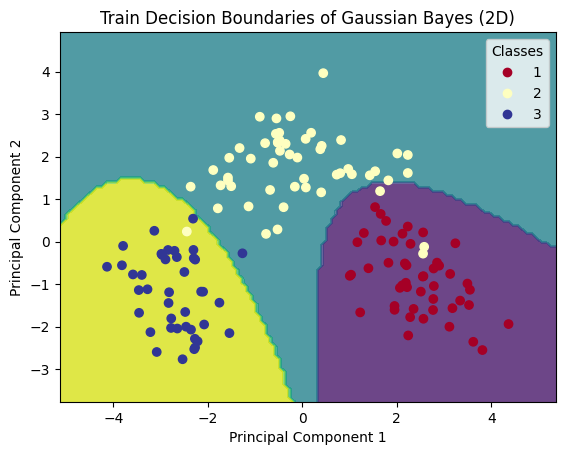

In [53]:
from sklearn.decomposition import PCA
from tqdm import tqdm

# Reduce the dimensionality of the data to 2 using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
    Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')
plt.title('Train Decision Boundaries of Gaussian Bayes (2D)')
plt.show()


(7134, 13)


7134it [00:33, 213.99it/s]


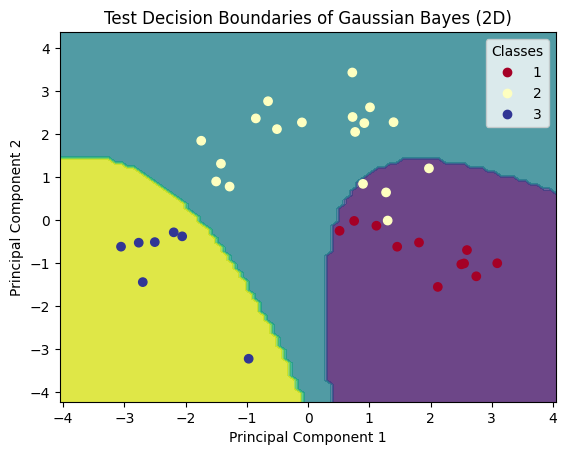

In [54]:
from sklearn.decomposition import PCA
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Reduce the dimensionality of the data to 2 using PCA
X_reduced = pca.transform(X_test_scaled)

# Create a grid of points for visualization in the reduced 2D space
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Use the GNB model to predict class labels for the grid points in the original 13D space
grid_points = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print(grid_points.shape)
Z = np.zeros(len(grid_points))
for idx, test_point in tqdm(enumerate(grid_points)):
    Z[idx] = classify_point_gaussian_bayes(test_point)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points in the reduced 2D space
plt.contourf(xx, yy, Z, alpha=0.8)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title='Classes')
plt.title('Test Decision Boundaries of Gaussian Bayes (2D)')
plt.show()


## Question 3 - Naive Bayes

In this problem, you’ll implement a basic Naïve Bayes classifier, and use it to predict if a tweet is about cyberbullying or not. <br/>
We will have to classify sentences into 5 categories, <b>but could be any number.</b><br/>
The categories are {"not bullying", "gender", "age", "religion", "ethnicity"}.


import libarires

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Implement the function. It reads all tweets from file and returns the following data structures: <br/>
•	texall - list of documents; each entry corresponds to a tweet which is list of words. <br/>
•	lbAll list of tweets' labels.<br/>
•	voc - set of all distinct words in the file.<br/>
•	cat - set of tweets categories.


In [2]:
def readTrainData(file_name):
    #here i am load
    df = pd.read_csv(file_name)

    #ithol the lists and the sets
    texAll = []
    lbAll = []
    voc = set()
    cat = set()

    #num of the rows
    num_rows = df.shape[0]

    #for loop i run 0 -> num rows
    for i in range(num_rows):

        row = df.iloc[i]

        # first clmun is the cat
        category = row[0]
        tweet = ' '.join(map(str, row[1:]))

        #split
        tokens = tweet.split()

        #uptade lists and the sets
        texAll.append(tokens)
        lbAll.append(category)
        voc.update(tokens)
        cat.add(category)


    return texAll, lbAll, voc, cat #return the lists and the sets


Implement the function, which computes and returns the probabilities (on the train set):<br/>
- $P_w$ - a matrix of class-conditional probabilities, $p(x|w_i)$
- $P$ - a vector of class priors, $p(w_i)$

Make sure you deal with the case of word that appears in voc but not in class $w$.

In [1]:
def learn_NB_text():
    num_categories = len(cat)  #num the cat
    num_words = len(voc)  #num the voc

    #ithol in zeros
    Pw = np.zeros((num_categories, num_words))
    P = np.zeros(num_categories)

    #convert sets to lists
    cat_list = list(cat)
    voc_list = list(voc)

    #foor loop for every cat
    for i, category in enumerate(cat_list):

        category_texts = [texAll_train[j] for j in range(len(texAll_train)) if lblAll_train[j] == category]
        num_category_texts = len(category_texts)#get the len of the cattexts

        #here we calcuted the porbabilty
        if len(texAll_train) != 0:  #asor helok 0
            P[i] = num_category_texts / len(texAll_train)

        # num the appearns of all word in all text voc
        for text in category_texts:
            for word in text:
                if word in voc:
                    word_index = voc_list.index(word)  #found the index of the words in the list
                    Pw[i, word_index] += 1


        Pw[i, :] += 1

    # Normalize Pw
    Pw = Pw / (Pw.sum(axis=1)[:, np.newaxis] + num_words)

    # Normalize P
    if P.sum() != 0:  # helok 0 asor
        P = P / P.sum()

    return Pw, P

Implement fhe function that classifies all tweets from the test set and computes the success rate.<br/>
Iterate over all tweets of test and for each tweet find the most probable category.
<br/><br/>
Note1: Multiplying lots of probabilities, which are between 0 and 1, can result in floating-point underflow. Since log(xy) = log(x) + log(y), it is better to perform all computations by summing logs of probabilities rather than multiplying probabilities. <br/>Class with highest final un-normalized log probability score is still the most probable.


In [2]:
def ClassifyNB_text(Pw, P):

    # Convert the sests
    cat_list = list(cat)
    voc_list = list(voc)

    # Initialize
    predictions = []

    # Calculate log probabilities
    logP = np.log(P)
    logPw = np.log(Pw)

    # for loop for every text
    for tweet in texAll_test:

        scores = np.zeros(len(cat)) #ithol in 0

        # Calculated score for every cat  and save it in score array
        for i, category in enumerate(cat_list):
            score = logP[i]  # Start with the log prior probability of the category
            for word in tweet:
                if word in voc_list:
                    word_index = voc_list.index(word)
                    score += logPw[i, word_index]  # Added  log proba  theword given the category
            scores[i] = score

        # get the max from the scores arrray
        predicted_category_index = np.argmax(scores)
        #push
        predictions.append(cat_list[predicted_category_index])

    #return the succes rate
    correct_predictions = sum([1 for i in range(len(lblAll_test)) if predictions[i] == lblAll_test[i]])
    success_rate = correct_predictions / len(lblAll_test)

    return success_rate

Read the files

In [5]:
TRAIN_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_train.csv'
TEST_FILE = 'https://sharon.srworkspace.com/ml/datasets/hw1/cyber_test.csv'

texAll_train, lblAll_train, voc, cat = readTrainData(TRAIN_FILE)
texAll_test, lblAll_test, _, __ = readTrainData(TEST_FILE)


Pw, P = learn_NB_text()
sum_right = ClassifyNB_text(Pw, P)
print(sum_right)


0.95018281535649


Train the model, classify it on the test and report the success rate

## Question 4 - KNN

You want to detect types into 6 types of stars by measuring their properties. <br/> NASA gave you their dataset, including temperature, color, Spectral_Class and more. <br/> In addition, you aim to compare different distance metric to determine which one is the best for this data.

import libaries

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_2020\3112706039.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the data, print the first three rows<br/>
https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv

In [7]:
# we here load the data that in the url that sharon put in the pdf
url = "https://sharon.srworkspace.com/ml/datasets/hw1/Stars.csv"
df = pd.read_csv(url)

# i print the first three rows in the data framee
df.head(3)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


Convert categorial features to discerete values

In [8]:
colors = df['Color'].unique()

for idx, color in enumerate(colors):
  df['Color'] = df['Color'].replace({color: idx})

spec_class = df['Spectral_Class'].unique()
for idx, spec in enumerate(spec_class):
 df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})

df.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_2020\4278636413.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Color'] = df['Color'].replace({color: idx})
C:\Users\User\AppData\Local\Temp\ipykernel_2020\4278636413.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spectral_Class'] = df['Spectral_Class'].replace({spec: idx})


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,0,0,0
1,3042,0.0005,0.1542,16.60,0,0,0
2,2600,0.0003,0.1020,18.70,0,0,0


Check the correlation matrix between the features. <br/>
Which distance metric do you expect to work better: Euclidean distance, of the Mahalanobis distance? <br/>
<font color='red'>Write here your answer and explain it</font>

In [9]:
correlation_matrix = df.corr()

print(correlation_matrix)



                Temperature         L         R       A_M     Color  \
Temperature        1.000000  0.393404  0.064216 -0.420261  0.535934   
L                  0.393404  1.000000  0.526516 -0.692619  0.199249   
R                  0.064216  0.526516  1.000000 -0.608728 -0.062509   
A_M               -0.420261 -0.692619 -0.608728  1.000000 -0.352271   
Color              0.535934  0.199249 -0.062509 -0.352271  1.000000   
Spectral_Class     0.527404  0.409473  0.001467 -0.433673  0.701516   
Type               0.411129  0.676845  0.660975 -0.955276  0.409732   

                Spectral_Class      Type  
Temperature           0.527404  0.411129  
L                     0.409473  0.676845  
R                     0.001467  0.660975  
A_M                  -0.433673 -0.955276  
Color                 0.701516  0.409732  
Spectral_Class        1.000000  0.477165  
Type                  0.477165  1.000000  


Split the data to 80% train and 20% test, with random state 21. <br/>
Make sure to maintain the dataset balanced, using stratify=y, in train_test_split method. <br/> You can check the balance using df.value_counts().

In [10]:


X = df.drop('Type', axis=1)  # remove the tagit colmun from the df
y = df['Type']  #itis the target column

#i am here split the data for test and train 80% 20% by randomstate21 by fanction traintestsplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# i check the balance
print(y_train.value_counts())
print(y_test.value_counts())

Type
1    32
3    32
5    32
0    32
4    32
2    32
Name: count, dtype: int64
Type
2    8
3    8
4    8
5    8
0    8
1    8
Name: count, dtype: int64


Implement the functions 'Euclidian', 'Manhattan'. <br/>
Those functions get train and test datasets and return distance metric, sized mxn (where m is the number of samples in test and n is the number of samples in train).<br/>
Reminder: Manhattan distance is $d(x,y)=\sum_{i=1}^d |x_i-y_i|$, d is the features number.


In [11]:
#this is the euclidan distances
def Euclidean(test, data):
    distances = np.zeros((test.shape[0], data.shape[0]))
    #for loop that pas for every point because i was to calacute the euclidan distance
    for i in range(test.shape[0]):
        for j in range(data.shape[0]):
          #the rule of the distance
            distances[i, j] = np.sqrt(np.sum((test[i] - data[j])**2))
    return distances #the function return the distance

#this is the euclidan distances
def Manhattan(test, data):
  #ithol
    distances = np.zeros((test.shape[0], data.shape[0]))
    #for loop that pas for every point because i was to calacute the euclidan distance
    for i in range(test.shape[0]):
        for j in range(data.shape[0]):
          #rule the distance
            distances[i, j] = np.sum(np.abs(test[i] - data[j]))
    return distances

#naton , this the mahalnobis distance
def Mahalanobis(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))
  covariance_matrix_data = np.cov(data, rowvar=False)
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          diff =  test[i] - data[j]
          distances[i, j] = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance_matrix_data)), diff.T))
  return distances

Implement the function kNN_classify that returns array sized m, which are the predictions for the m test samples.

In [12]:
def kNN_classify(data, labels, test, k, metric='Euclidean'):
#i here check what the metric that i get , the metric mothal to be euclidean
    if metric == 'Euclidean':
        distances = Euclidean(test, data)
    elif metric == 'Manhattan':
        distances = Manhattan(test, data)
    elif metric == 'Mahalanobis':
        distances = Mahalanobis(test, data)
    else:
        raise ValueError(f"Unknown metric: {metric}")

    # give me the k index of the k nearst neighbors
    k_nearest_neighbors_indices = np.argsort(distances, axis=1)[:, :k]

    # give me the k labels of the k nearst neighbors
    k_nearest_neighbors_labels = labels[k_nearest_neighbors_indices]

    #perdict
    predictions = np.array([np.argmax(np.bincount(labels)) for labels in k_nearest_neighbors_labels])

    return predictions.flatten()

Look at the plots for different k values and compare those metrics.

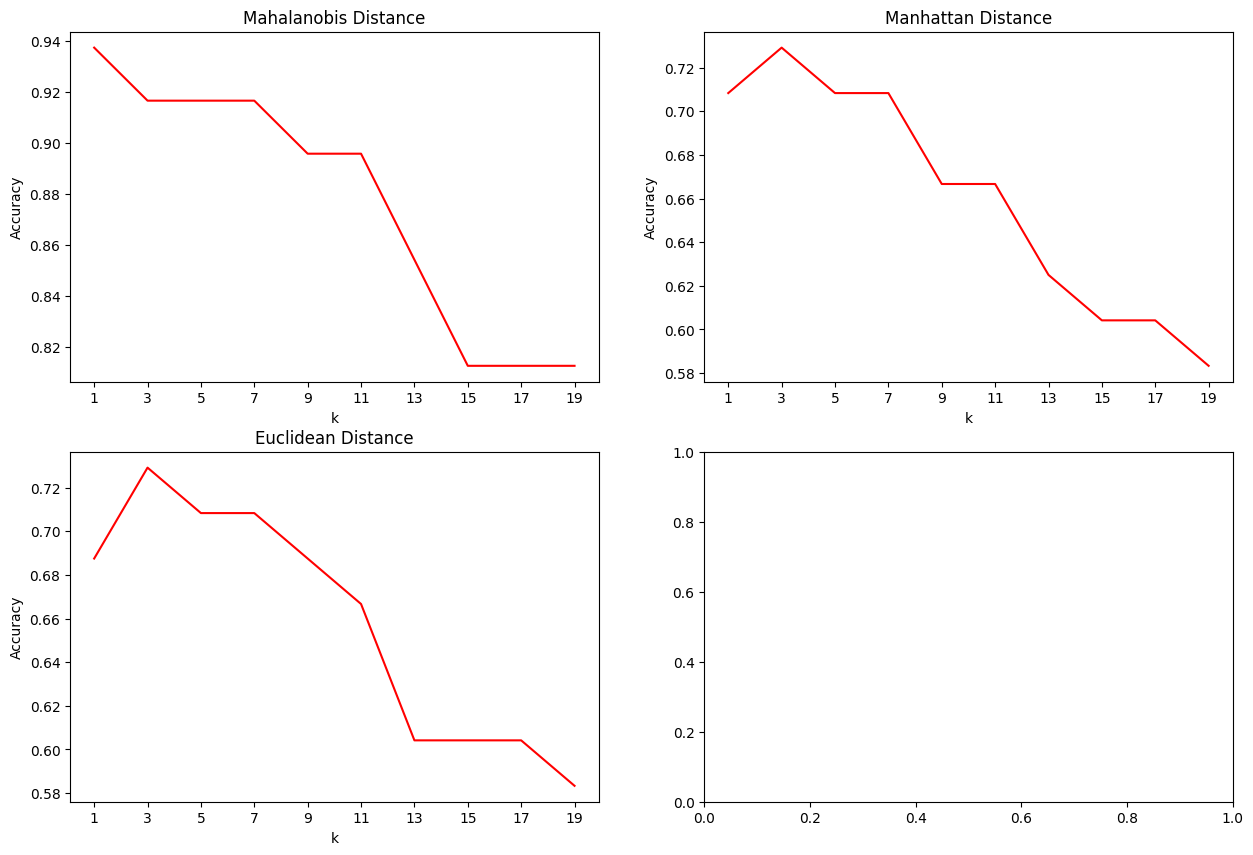

In [13]:
metrics = ['Mahalanobis', 'Manhattan','Euclidean']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
    ks = np.arange(1, 20, 2)
    accs = []

    for k in ks:
        #predict
        predictions = kNN_classify(X_train.values, y_train.values, X_test.values, k, metric)

        #we here calcucute accuarcy
        accuracy = np.mean(predictions == y_test.values)
        accs.append(accuracy)

    axs[idx // 2, idx % 2].plot(ks, accs, color='red')
    axs[idx // 2, idx % 2].set_xlabel('k')
    axs[idx // 2, idx % 2].set_ylabel('Accuracy')
    axs[idx // 2, idx % 2].set_title(f'{metric} Distance')
    axs[idx // 2, idx % 2].set_xticks(ks)
plt.show()

The Mahalanobis distance metric is already implemented to you. <br/>Run the following code and answer: Which gives better accuracy?<br/>
<font color='red'>Write here your answer and explain it</font>

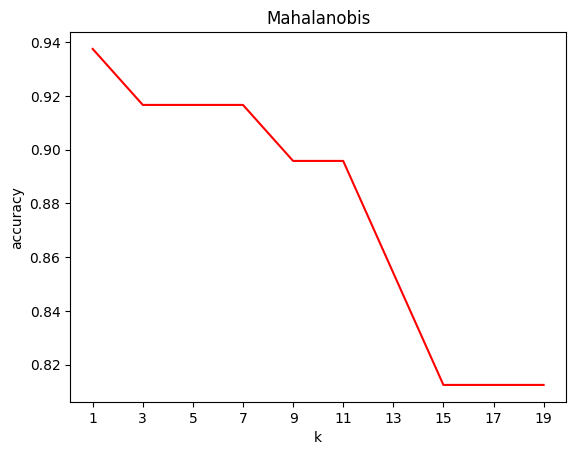

In [ ]:
fig, ax = plt.subplots()

ks = np.arange(1, 20, 2)
accs = []
for k in ks:
    predictions = kNN_classify(X_train.values, y_train.values, X_test.values, k, 'Mahalanobis')
    accuracy = np.mean(predictions == y_test.values)
    accs.append(accuracy)

ax.plot(ks, accs, color='red')
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.set_title('Mahalanobis')
ax.set_xticks(ks)
plt.show()

### Thats it!
If you choose to continue, 5 pts bonus!

We want to use advanced distance metric: <br/>
$$d_{\text{hybrid}}=d_{\text{mahalanobis}}+0.5*d_{\text{cosine}}$$
Implement the function 'Hybrid', which returns the distance metric, as defined above.


In [ ]:
def Cosine(test, data):
  distances = np.zeros((test.shape[0], data.shape[0]))

  # Calculate the Cosine distances
  for i in range(test.shape[0]):
      for j in range(data.shape[0]):
          distances[i, j] = 1 - np.sum(test[i] * data[j]) / (np.linalg.norm(test[i]) * np.linalg.norm(data[j]))
  return distances

def Hybrid(test, data):
  # Implement here, 1-3 lines

SyntaxError: incomplete input (<ipython-input-25-d6b41e850cde>, line 11)

Look at the plot. Does it perform better than the previous metrics?

In [ ]:
def calculate_accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    accuracy = correct_predictions / len(true_labels)
    return accuracy

# Then in your loop where you're calculating accuracies:
accs = []
for k in ks:
    c = kNN_classify(X_train, y_train, X_test, k, 'Euclidean')  # Replace 'Euclidean' with your desired metric
    acc = calculate_accuracy(c, y_test)  # Manually compute the accuracy
    accs.append(acc)


axs[1, 1].plot(ks, accs, color='red')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('accuracy')
axs[1, 1].set_title('Hybrid')
axs[1, 1].set_xticks(ks)
plt.show()

You forgot to use scaling! Based on the feature densities (as done in Q3), determine which scaler should we use and perform it.

In [ ]:
# Peform scaling

Look at the plots. Did it help the accuracies? Try to justify the change in the hybrid metric.  
<font color='red'>Write here your answer and explain it</font>

In [ ]:
metrics = ['Euclidean', 'Manhattan', 'Mahalanobis', 'Hybrid']
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, metric in enumerate(metrics):
  # Plot data points and fitting line for Ordinary Least Squares

  ks = np.arange(1, 20, 2)
  accs = []
  for k in ks:
    c = kNN_classify(X_train_scaled, y_train, X_test_scaled, k, metric)
    accs.append()   # Implement here

  axs[idx // 2, idx % 2].plot(ks, accs, color='red')
  axs[idx // 2, idx % 2].set_xlabel('k')
  axs[idx // 2, idx % 2].set_ylabel('accuracy')
  axs[idx // 2, idx % 2].set_title(metric)
  axs[idx // 2, idx % 2].set_xticks(ks)
plt.show()